# Les arbres

## Pour rappel  : 
Un arbre est constitué :
- d'une racine, sommet de "départ" de l'arbre ;
- de noeuds, sommets intermédiaires de l'arbre ;
- de feuilles, sommets "finaux" de l'arbre ;
- et de branches, qui relient les éléments précédents entre eux.

![Image : Un exemple d'arbre](http://www.maths-info-lycee.fr/images/arbre1.jpg)  

## Algorithmes sur les arbres binaires
On donne l'implémentation suivante de la structure de données "arbre".

In [4]:
class ArbreB:
    def __init__(self, valeur, gauche = None, droit = None):
        self.noeud = valeur
        self.gauche = gauche
        self.droit = droit
        
    
    def __repr__(self):
        return str(self.noeud) +str(self.gauche).replace('None','.')+str(self.droit).replace('None','.')
    
        
arbre_f = ArbreB('f')
arbre_g = ArbreB('g')
arbre_c = ArbreB('c',arbre_f,arbre_g)
print(arbre_c)

cf..g..


### Méthodes et fonctions de base

1. Construire l'arbre donné : 
![Image](http://www.maths-info-lycee.fr/images/arbre_parfait2b.jpg)

2. Ecrire une méthode estVide() renvoyant vrai si l'arbre est vide

In [ ]:
def est_Vide(self) :
    pass

In [ ]:
arbre_vide = ArbreB(None)
assert arbre_vide.est_Vide() == True
assert arbre.est_Vide() == False

3. Ecrire une méthode estFeuille() renvoyant un booléen Vrai si l'arbre est une feuille

In [ ]:
def estFeuille (self) :
    pass

In [ ]:
assert arbre_vide.estFeuille() == False
assert arbre_f.estFeuille() == True
assert arbre_d.estFeuille() == False

4. Ecrire une fonction donnant la taille de l'arbre, et une autre fonction donnant la hauteur de l'arbre (on peut faire une méthode, c'est un peu plus besogneux)

In [ ]:
def taille(self):
    pass

In [ ]:
assert arbre_f.taille() == 1
assert arbre_vide.taille() == 0
assert arbre_d.taille() == 3
assert arbre.taille() == 10

### Parcours
#### En profondeur
Prenez le temps de comprendre la fonction de parcours préfixe puis ecrire les deux fonctions de parcours infixe et suffixe d'un arbre. On affichera le parcours dans un premier temps. Dans un deuxième temps, on renverra le parcours dans un tableau dynamique Python.

In [1]:
p = [2]+[3]
print(p)

[2, 3]


In [ ]:
def parcoursPrefixe(self):
    # Condition d'arrêt
    if self.noeud is None:
        return []
    parcours_gauche =[]
    parcours_droit =[]
    if not self.gauche is None :
        parcours_gauche = self.gauche.parcoursPrefixe()
    if not self.droit is None : 
        parcours_droit = self.droit.parcoursPrefixe()
    return [self.noeud]+ parcours_gauche + parcours_droit

def parcoursInfixe(self):

    return parcours

def parcoursSuffixe(self):

    return parcours

In [ ]:
prefixe = arbre.parcoursPrefixe()
print("prefixe : ", prefixe)

In [ ]:
infixe = arbre.parcoursInfixe()
print("infixe : ", infixe)

In [ ]:
suffixe = arbre.parcoursSuffixe()
print("suffixe : ", suffixe)

### En largeur
Appliquer l'algorithme du cours pour donner le parcours en largeur d'un arbre.

In [ ]:
from collections import deque

def parcoursLargeur(arbre):
    file = deque()
    parcours = []

    return parcours

largeur = parcoursLargeur(arbre_a)
print(largeur)
        
    

### Un utilitaire pour la suite du notebook
L'utilitaire suivant permet de tracer des arbres binaires

In [5]:
# utilitaire pour représenter les arbres binaires
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

def hauteur(arbre):
    if arbre is None:
        return 0
    else:
        return 1 + max(hauteur(arbre.gauche), hauteur(arbre.droit))
    
def parkour(arbre, noeuds, branches, position, profondeur, pos_courante):
    if arbre is not None:
        noeuds.append(arbre.noeud)            # on complète la liste des noeuds
        position[arbre.noeud] = (pos_courante,profondeur)     # ... et la liste des positions
        profondeur -= 1 
        if arbre.gauche is not None:
            branches.append((arbre.noeud, arbre.gauche.noeud))  #... et la liste des branches
            parkour(arbre.gauche, noeuds, branches, position, profondeur, 
                    pos_courante - 2**(profondeur - 1))
        if arbre.droit is not None:
            branches.append((arbre.noeud, arbre.droit.noeud))
            parkour(arbre.droit, noeuds, branches, position, profondeur, 
                    pos_courante + 2**(profondeur - 1))
    return noeuds, branches, position 


def repr_graph(arbre):
    noeuds = []             #liste des noeuds, racines et feuilles de l'arbre
    branches =[]            # liste des branches de l'arbre
    profond = hauteur(arbre)        #hauteur de l'arbre
    pos_courante = 2**(profond - 1)   # position de la racine (en abscisse)
    position = {}                # dictionnaire des positions des noeuds sur la figure
     
    # appel d'une fonction récursive de parcours, ici prefixe mais ça n'a pas d'importance
    # on récupère : la liste des noeuds, la liste des branches,
    # le dictionnaire des positions des noeuds
    noeuds, branche, position  = parkour(arbre, noeuds, branches, position, profond, pos_courante)    
    #print(position)

    mon_arbre = nx.Graph()          # objet Graphe de la bibliothèque Networkxx
    mon_arbre.add_nodes_from(noeuds)
    mon_arbre.add_edges_from(branches)
    #print(list(arbre.nodes))
    #print(list(arbre.edges))
    #Si vous voulez changer des couleurs, amusez-vous ci-dessous
    #Plein de noms de couleurs là : http://www.letoileauxsecrets.fr/couleurs/couleurs-gris.html
    options = {
        "font_size": 12,
        "node_size": 300,
        "node_color": "white",
        "edge_color" : "green",
        "edgecolors": "blue",
        "linewidths": 1,
        "width": 2,
    }
    # plt.figure(figsize=(12,8))     # pour changer la taille de la figure
    nx.draw_networkx(mon_arbre, pos = position, **options)
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()
    return(mon_arbre)      #on renvoie l'objet graphe networkxx au cas où


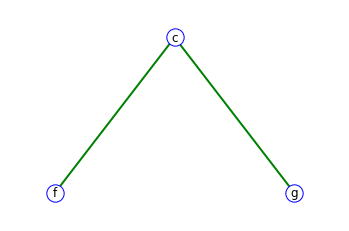

In [8]:
arbre = repr_graph(arbre_c)

### Exercice : reconstruction d'un arbre
Avec la déforestation massive, il est important de savoir reconstruire les arbres (désolé...). 
Le but de cet exercice est de reconstruire un arbre connaissant son parcours infixe et son parcours suffixe.  
_Exemple_ :   
Le parcours infixe d'un arbre est `[4, 8, 2, 5, 1, 6, 3, 7]` 
le parcours suffixe de ce même arbre est `[8, 4, 5, 2, 6, 7, 3, 1]`
L'arbre correspondant est:  
![Image](http://www.maths-info-lycee.fr/images/arbre_inf_suff.jpg)  
_Méthode_ :
1. Que représente le dernier noeud dans le parcours suffixe ?
2. Où sont situés dans l'arbre les noeuds présents avant le noeud 1, dans le parcours infixe ? Idem avec ceux qui sont après.
3. Itérer le processus, vérifier "à la main" que l'on obtient bien l'arbre ci-dessus.  
  
Ecrire une fonction (récursive a priori) `constrArbre(infx, sufx, arbre)` qui implémente cette méthode. La fonction renverra un objet Arbre. On supposera que les parcours infixe et suffixe sont cohérents.  
On pourra s'aider des spécifications suivantes.

In [ ]:
class ArbreB:
    def __init__(self, valeur, gauche = None, droit = None):
        self.noeud = valeur
        self.gauche = gauche
        self.droit = droit
    def __repr__(self):
        return str(self.noeud) +str(self.gauche).replace('None','.')+str(self.droit).replace('None','.')

def indexRacineSufx(infx, sufx, debut_infx, fin_infx):
    """
    Renvoie l'index de la racine d'un sous-arbre, dont le parcours infixe est donné par infx[ind_debut, ind_fin]
    Le parcours suffixe du sous_arbre n'est pas donné mais peut s'extraire de sufx
    l'index est celui de la racine dans le parcours suffixe sfx
    @param infx : liste du parcours infixe de l'arbre 
    @param sufx : liste du parcours suffixe de l'arbre 
    @param debut_infx, fin_infx : indices de début et de fin du sous-arbre dans le parcours infixe
    @return ind_racine : indice de la racine du sous-arbre dans le parcours suffixe
    """
    ind_racine = 0

    return ind_racine

def constrArbre(infx, sufx, debut_infx, fin_infx):
    """
    Construit un arbre à partir des parcours infixe et suffixe
    @param infx : liste des sommets de l'arbre dans le parcours infixe 
    @param sufx : liste des sommets de l'arbre dans le parcours suffixe 
    @param arbre : objet de la classe Arbre en cours de construction 
    @return arbre : arbre construit 
    """
    if debut_infx >= fin_infx :
        return None
    else:
        arbre = ArbreB(None)
        
        return arbre

infixe = [4, 8, 2, 5, 1, 6, 3, 7]
suffixe = [8, 4, 5, 2, 6, 7, 3, 1]

arbre = constrArbre(infixe, suffixe, 0, len(infixe))
print(arbre)
arbrenx = repr_graph(arbre)